### Análisis y Procesamiento de Señales - 2do Cuatrimestre 2025
# **Tarea Semanal 8**: *Filtrado digital lineal de ECG*
#### Mora Taranilla y Victoria Jazmín Salgado

## **Resumen**
Esta tarea semanal se enfoca en el diseño y aplicación de filtros digitales. Se realizó una plantilla definida por el ancho de banda de la señal de un electrocardiograma y posteriormente se llevó a cabo el filtrado de la señal a partir de filtros IIR y FIR. 

## **Introducción Teórica**

Dentro de los filtros digitales, se pueden encontrar aquellos que tienen una respuesta al impulso finita (FIR) o infinita (IIR). A continuación se exponen sus principales diferencias.

### Filtros FIR
Un filtro FIR no cuenta con recursividad, es decir, los coeficientes $a_i$ del sistema son cero menos en caso de $a_0$, donde el valor es igual a 1. De esta forma, el filtro se puede representar, en forma de ecuaciones en diferencias de la siguiente manera:

$$
y[n] = \sum_{k=0}^{N-1} b_k \cdot x[n-k]
$$

Siendo N la longitud del vector de coeficientes $b_i$. En este caso, la sumatoria comienza en cero ya que se trabaja sobre señales causales.

Se clasifican los mismos en cuatro tipos, que dependen de la simetría de la respuesta al impulso (par o impar) y la longitud de la misma (par o impar). De esta forma se definen:

- Tipo I: Simetría par y longitud impar.
- Tipo II: Simetría par y longitud par.
- Tipo III: Simetría impar y longitud impar.
- Tipo IV: Simetría impar y longitud par.

Los filtros FIR cuentan con muchas ventajas, entre ellas que los mismos son siempre estables, ya que los polos se encuentran únicamente en el origen y que pueden diseñarse con fase lineal, lo que asegura un retardo constante. Para llevar a cabo un filtro FIR hay tres métodos principales: método de ventanas, método de cuadrados mínimos y método de Parks-McClellan. 

### Filtros IIR

La **ecuación en diferencias** causal general de un filtro IIR (normalizada con $a_0 = 1$) es

$$
y[n] = \sum_{k=0}^{N} b_k\,x[n-k] \;-\; \sum_{k=1}^{M} a_k\,y[n-k] , \qquad n\in\mathbb{Z}
$$

La ventaja de este tipo de filtros, frente a los FIR descritos anteriormente, es que pueden cumplir con especificaciones pedidas con un orden menor que el filtro FIR equivalente, lo que resulta en menor costo computacional y mayor velocidad .

El uso de filtros en este trabajo será necesario para mitigar los efectos que tendrá el ruido proveniente de diversas fuentes sobre la señal que se desea estudiar, en este caso una ECG
- Ruido causado por el movimiento de los electrodos (alta frecuencia)
- Ruido muscular (alta frecuencia)
- Movimiento de la  línea de base del ECG (baja frecuencia)

## **Desarrollo del Trabajo**
En primer lugar, se llevó a cabo el diseño de la plantilla para el filtrado de la señal de ECG. Esta se realizó en base a una estimación del ancho de banda de la misma. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import scipy.io as sio
from plantilla_TS8 import plantilla

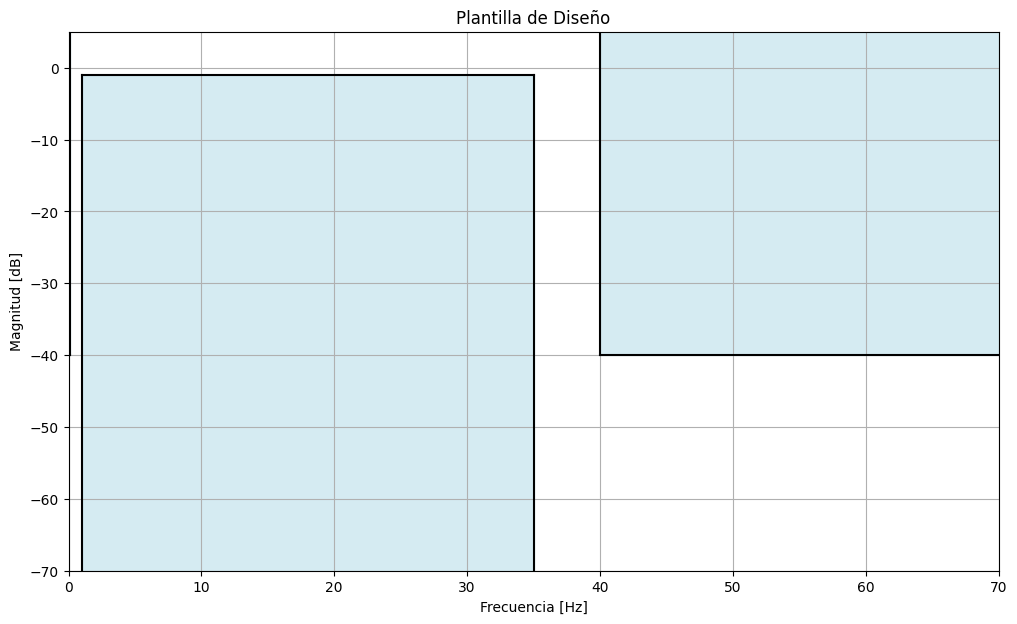

In [2]:
fs = 1000 #Hz
ripple = 1 # dB
atenuacion = 40 # dB

wp = [1, 35] #Hz
ws = [0.1, 40] #Hz

plt.figure(figsize=(12,7))
plt.title('Plantilla de Diseño')
plantilla(ws = ws, wp = wp, fs = fs ,ripp = ripple, att = atenuacion)
plt.xlim([0,70])
plt.ylim([-70,5])
plt.show()

Una vez que se contó con la plantilla de diseño de los filtros, se prodeció al filtrado de la señal implementando tanto filtros IIR como FIR.

**FILTROS IIR:**
Se utilizaron los siguientes filtros IIR:
- Butterworth (planicidad máxima)
- Chebyschev (I y II)
- Cauer (Elliptic)

Se comienza por importar la señal de ECG a filtrar, y se grafica a continuación para obtener una visión general de la  misma. De esta manera es posible observar a simple vista el movimiento de la línea de base, ya que la señal se ve montada sobre baja frecuencia. 

In [3]:
fs_ecg = 1000 # Hz

sio.whosmat('ECG_TP4.mat')
mat_struct = sio.loadmat('./ECG_TP4.mat')

ecg_one_lead = mat_struct['ecg_lead'].squeeze()
N = len(ecg_one_lead)

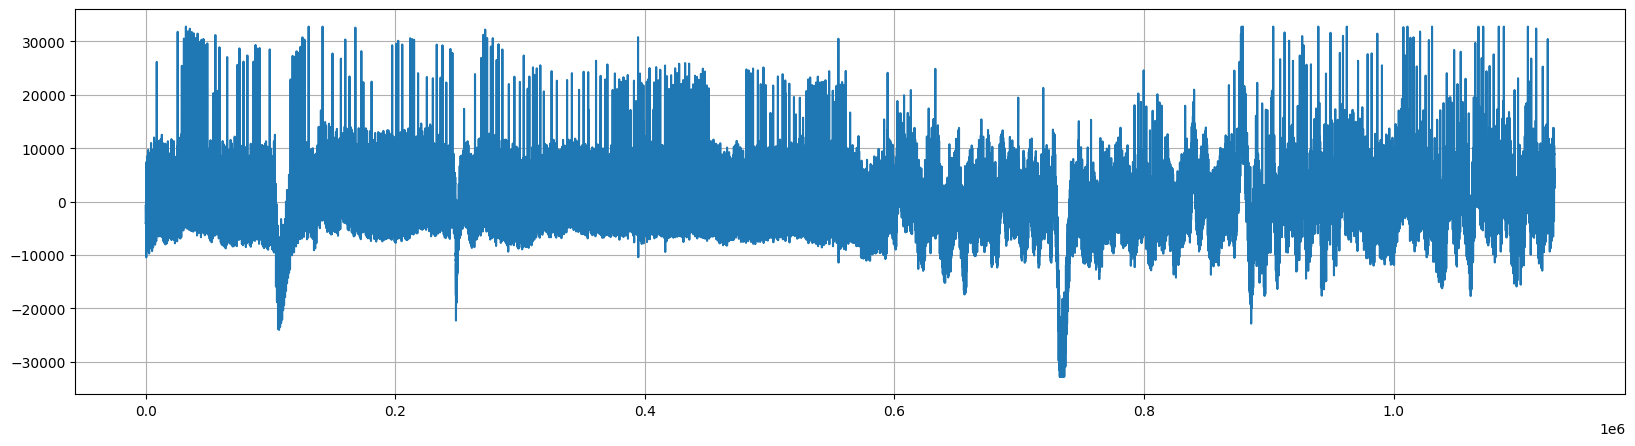

In [4]:
plt.figure(figsize=(20,5))
plt.plot(ecg_one_lead)
plt.grid(True)

Luego se diseñan los filtros IIR, utilizando la funcion de scipy *iirdesign*. Esta función utiliza los parámetros definidos en la plantilla de diseño, y devuelve las secciones bicuadráticas necesarias para la implementación del filtro. 

In [5]:
f_aprox = 'butter'
mi_sos_butter = signal.iirdesign(wp=wp, ws=ws, gpass=ripple, gstop=atenuacion, analog=False, ftype=f_aprox, output='sos', fs=fs)

f_aprox = 'cheby1'
mi_sos_cheby1 = signal.iirdesign(wp=wp, ws=ws, gpass=ripple, gstop=atenuacion, analog=False, ftype=f_aprox, output='sos', fs=fs)

f_aprox = 'cheby2'
mi_sos_cheby2 = signal.iirdesign(wp=wp, ws=ws, gpass=ripple, gstop=atenuacion, analog=False, ftype=f_aprox, output='sos', fs=fs)

f_aprox = 'cauer'
mi_sos_cauer = signal.iirdesign(wp=wp, ws=ws, gpass=ripple, gstop=atenuacion, analog=False, ftype=f_aprox, output='sos', fs=fs)

Se sigue por aplicar los filtros diseñados sobre la señal ECG. 
Para poder asegurar una respuesta de fase lineal se implementa el filtro bidireccionalmnete (utilizando *sosfiltfilt*). Esto es de suma importancia en este tipo de señales, ya que de esta manera se tendrá un retardo constante para toda las frecuencias. Así será posible preservar la forma y el alineamiento de las ondas. 

In [6]:
ecg_filt_butter = signal.sosfiltfilt(mi_sos_butter, ecg_one_lead)
ecg_filt_cauer = signal.sosfiltfilt(mi_sos_cauer, ecg_one_lead)
ecg_filt_cheby1 = signal.sosfiltfilt(mi_sos_cheby1, ecg_one_lead)
ecg_filt_cheby2 = signal.sosfiltfilt(mi_sos_cheby2, ecg_one_lead)

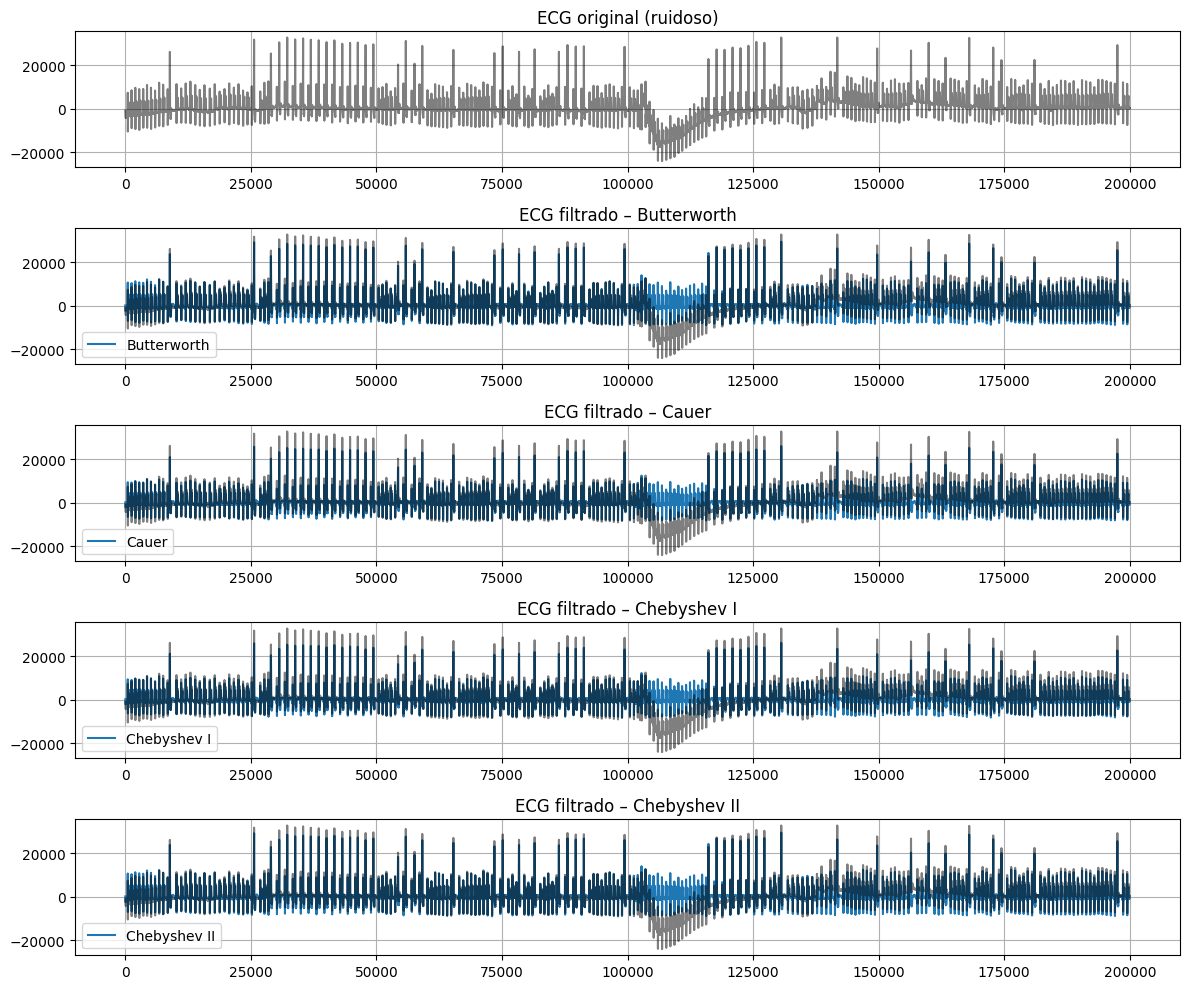

In [7]:
#panorama general mas muestras

plt.figure(figsize=(12,10))

# Señal original
plt.subplot(5,1,1)
plt.plot(ecg_one_lead[:200000], color='k', alpha=0.5)
plt.title('ECG original (ruidoso)')
plt.grid(True)

# Butterworth
plt.subplot(5,1,2)
plt.plot(ecg_filt_butter[:200000], label='Butterworth')
plt.plot(ecg_one_lead[:200000], color='k', alpha=0.5)
plt.title('ECG filtrado – Butterworth')
plt.legend()
plt.grid(True)

# Cauer / Elliptic
plt.subplot(5,1,3)
plt.plot(ecg_filt_cauer[:200000], label='Cauer')
plt.plot(ecg_one_lead[:200000], color='k', alpha=0.5)
plt.title('ECG filtrado – Cauer')
plt.legend()
plt.grid(True)

# Chebyshev I
plt.subplot(5,1,4)
plt.plot(ecg_filt_cheby1[:200000], label='Chebyshev I')
plt.plot(ecg_one_lead[:200000], color='k', alpha=0.5)
plt.title('ECG filtrado – Chebyshev I')
plt.legend()
plt.grid(True)

# Chebyshev II
plt.subplot(5,1,5)
plt.plot(ecg_filt_cheby2[:200000], label='Chebyshev II')
plt.plot(ecg_one_lead[:200000], color='k', alpha=0.5)
plt.title('ECG filtrado – Chebyshev II')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


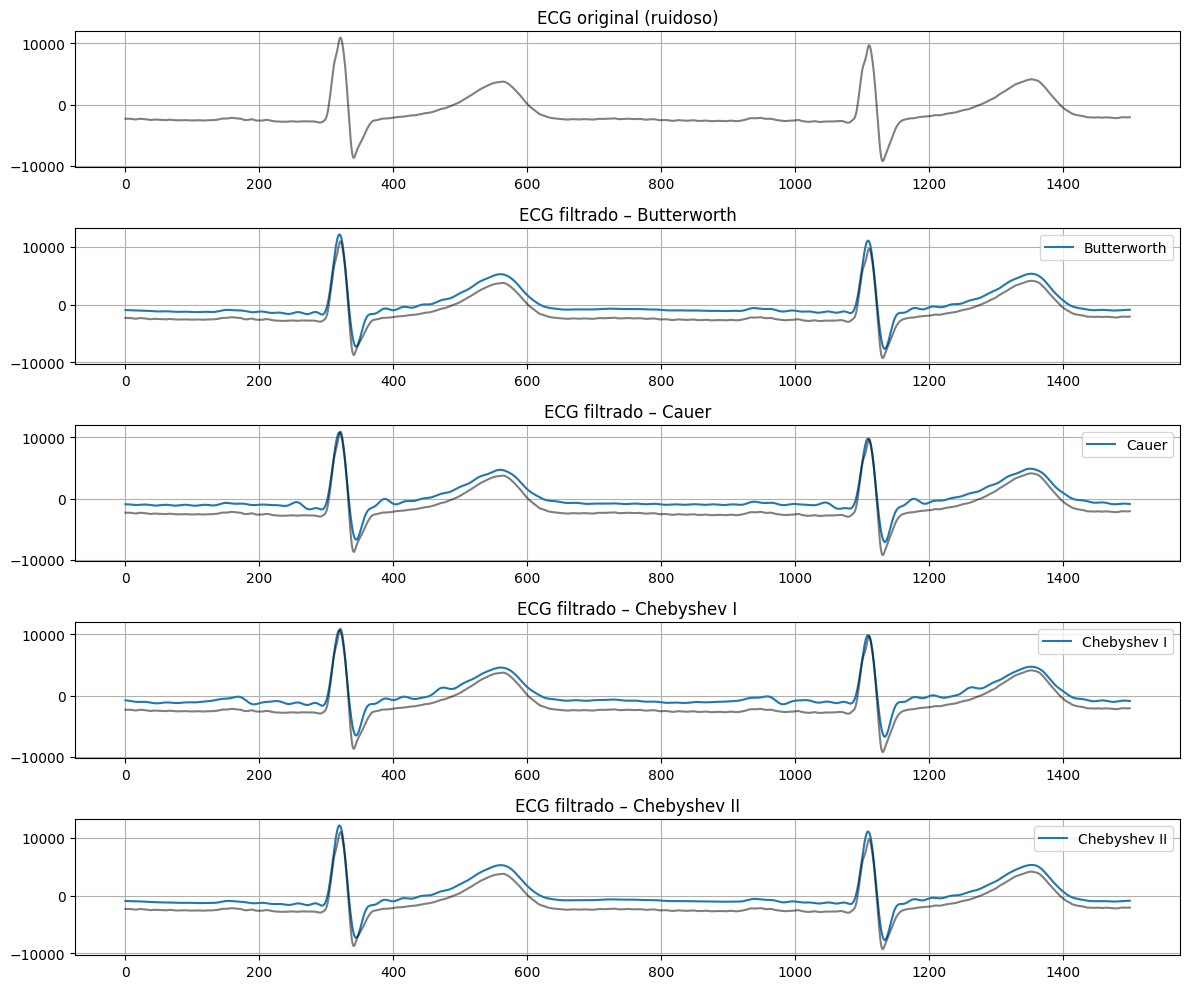

In [8]:
#Región de interés 1 [4000:5500] - zona no ruidosa

plt.figure(figsize=(12,10))

# Señal original
plt.subplot(5,1,1)
plt.plot(ecg_one_lead[4000:5500], color='k', alpha=0.5)
plt.title('ECG original (ruidoso)')
plt.grid(True)

# Butterworth
plt.subplot(5,1,2)
plt.plot(ecg_filt_butter[4000:5500], label='Butterworth')
plt.plot(ecg_one_lead[4000:5500], color='k', alpha=0.5)
plt.title('ECG filtrado – Butterworth')
plt.legend()
plt.grid(True)

# Cauer / Elliptic
plt.subplot(5,1,3)
plt.plot(ecg_filt_cauer[4000:5500], label='Cauer')
plt.plot(ecg_one_lead[4000:5500], color='k', alpha=0.5)
plt.title('ECG filtrado – Cauer')
plt.legend()
plt.grid(True)

# Chebyshev I
plt.subplot(5,1,4)
plt.plot(ecg_filt_cheby1[4000:5500], label='Chebyshev I')
plt.plot(ecg_one_lead[4000:5500], color='k', alpha=0.5)
plt.title('ECG filtrado – Chebyshev I')
plt.legend()
plt.grid(True)

# Chebyshev II
plt.subplot(5,1,5)
plt.plot(ecg_filt_cheby2[4000:5500], label='Chebyshev II')
plt.plot(ecg_one_lead[4000:5500], color='k', alpha=0.5)
plt.title('ECG filtrado – Chebyshev II')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

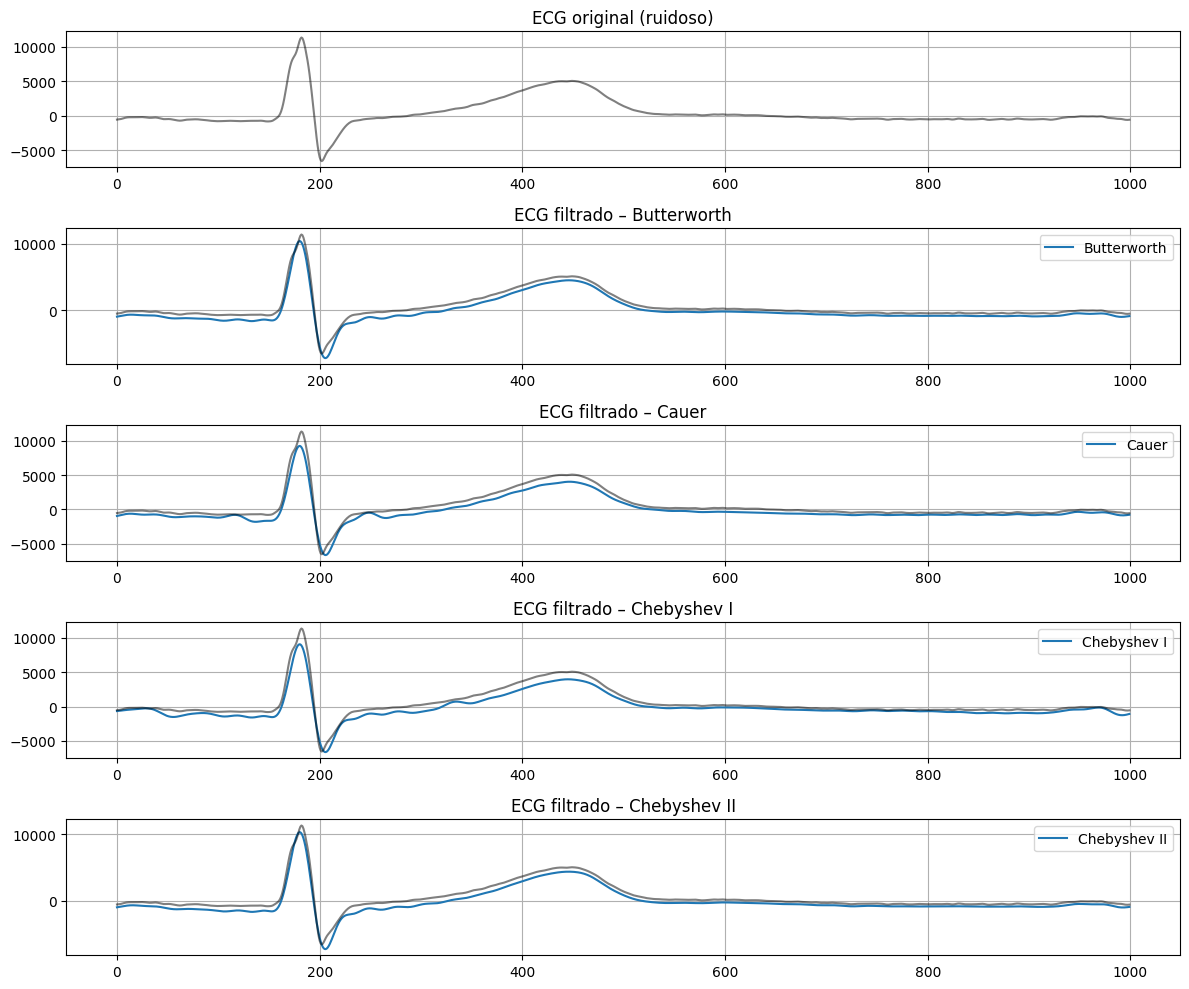

In [9]:
#Región de interés 2 [10e3, 11e3] - zona no ruidosa

plt.figure(figsize=(12,10))

# Señal original
plt.subplot(5,1,1)
plt.plot(ecg_one_lead[10000 : 11000], color='k', alpha=0.5)
plt.title('ECG original (ruidoso)')
plt.grid(True)

# Butterworth
plt.subplot(5,1,2)
plt.plot(ecg_filt_butter[10000 : 11000], label='Butterworth')
plt.plot(ecg_one_lead[10000 : 11000], color='k', alpha=0.5)
plt.title('ECG filtrado – Butterworth')
plt.legend()
plt.grid(True)

# Cauer / Elliptic
plt.subplot(5,1,3)
plt.plot(ecg_filt_cauer[10000 : 11000], label='Cauer')
plt.plot(ecg_one_lead[10000 : 11000], color='k', alpha=0.5)
plt.title('ECG filtrado – Cauer')
plt.legend()
plt.grid(True)

# Chebyshev I
plt.subplot(5,1,4)
plt.plot(ecg_filt_cheby1[10000 : 11000], label='Chebyshev I')
plt.plot(ecg_one_lead[10000 : 11000], color='k', alpha=0.5)
plt.title('ECG filtrado – Chebyshev I')
plt.legend()
plt.grid(True)

# Chebyshev II
plt.subplot(5,1,5)
plt.plot(ecg_filt_cheby2[10000 : 11000], label='Chebyshev II')
plt.plot(ecg_one_lead[10000 : 11000], color='k', alpha=0.5)
plt.title('ECG filtrado – Chebyshev II')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

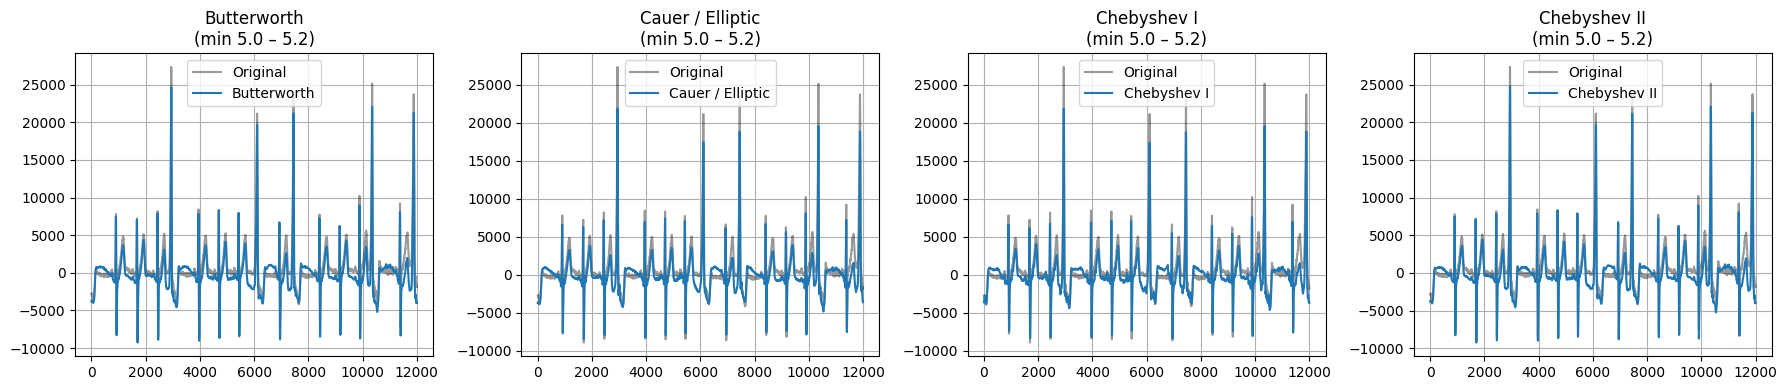

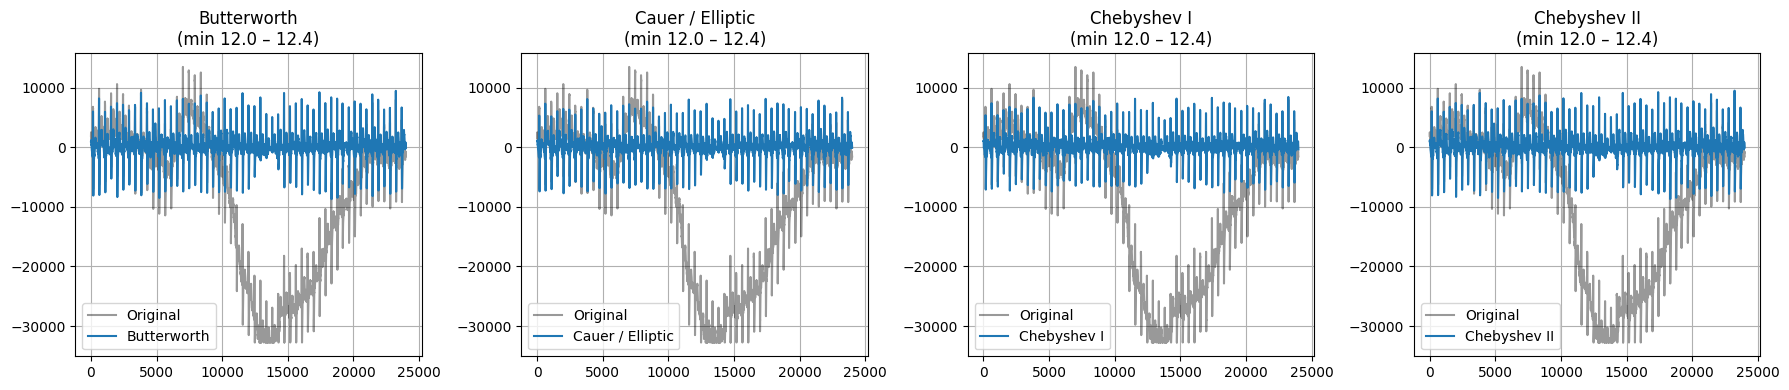

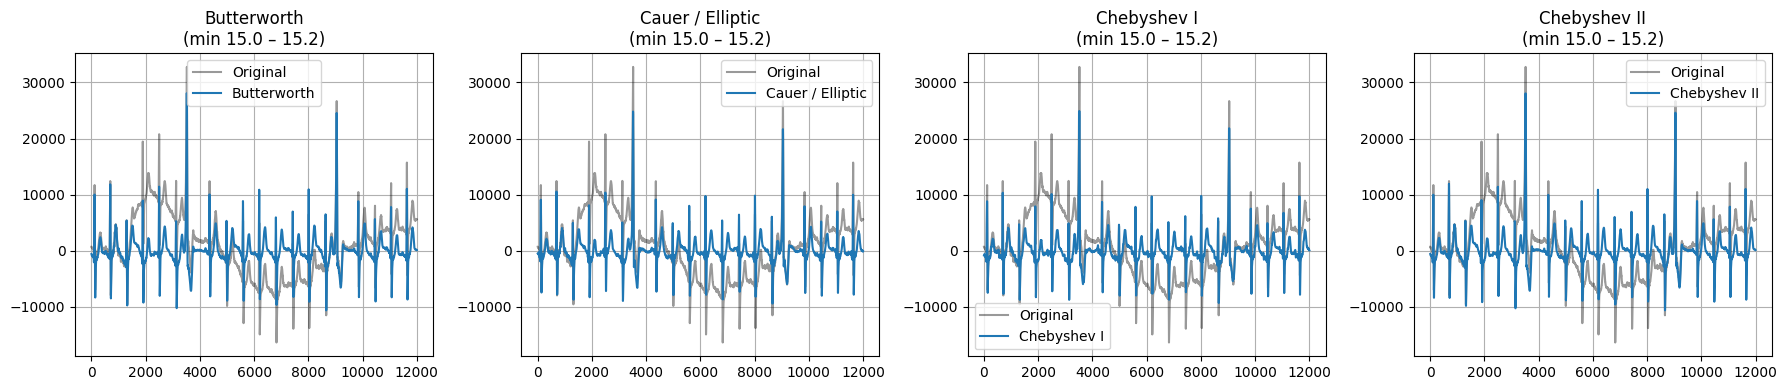

In [10]:
# Regiones de interés RUIDOSAS en minutos → muestras
regs_interes = (
    np.array([5, 5.2])  * 60 * fs,
    np.array([12, 12.4]) * 60 * fs,
    np.array([15, 15.2]) * 60 * fs,
)

regs_interes = [(int(a), int(b)) for a, b in regs_interes]

filtros = [
    (ecg_filt_butter, "Butterworth"),
    (ecg_filt_cauer,  "Cauer / Elliptic"),
    (ecg_filt_cheby1, "Chebyshev I"),
    (ecg_filt_cheby2, "Chebyshev II"),
]

for (i0, i1) in regs_interes:
    
    plt.figure(figsize=(18,4))

    for j, (filt, nombre) in enumerate(filtros, start=1):

        plt.subplot(1, 4, j)
        plt.plot(ecg_one_lead[i0:i1], color='k', alpha=0.4, label="Original")
        plt.plot(filt[i0:i1], label=nombre)
        plt.title(f"{nombre}\n(min {i0/(fs*60):.1f} – {i1/(fs*60):.1f})")
        plt.grid(True)
        plt.legend()

    plt.tight_layout()
    plt.show()

**FILTROS FIR:**
Los métodos de implementación digital para filtros de respuesta al impulso finita mencionados anteriormente se rigen por la siguiente metodología:

- Método de Ventanas:

Este es un método directo, que garantiza el funcionamiento al diseñarlo, pero no es el óptimo. A la respuesta deseada del filtro se le aplica la antitransformada de Fourier, obteniendo la respuesta al impulso con soporte infinito. La misma se ventanea para lograr una aproximación sin soporte infinito. La respuesta al impulso ventaneada determina los coeficientes del filtro. 

- Método de Cuadrados Mínimos (Least Squares):

Es un método directo al igual que el método por ventanas y tiene asegurada la convergencia. El mismo tiene como objetivo minimizar el error cuadrático medio que hay entre la respuesta deseada y la respuesta en frecuencia del filtro, es decir:

$$
|E(\Omega)|^2 = \sum_{\Omega\in F} |D(\Omega) - H_R(\Omega)|^2
$$

Siendo $D(\Omega)$ la respuesta deseada y $H_R(\Omega)$ la respuesta en frecuencia del filtro.

- Método de Parks-McClellan (Remez):

A diferencia de los métodos mencionados anteriormente, este último si es iterativo, es decir que, se lleva a cabo mediante un algoritmo que se repita hasta obtener un resultado que cumpla las condiciones propuestas. Al ser iterativo, no se asegura la convergencia lo que presenta una alta desventaja frente a los métodos anteriores. Este método busca minimizar el error entre la respuesta deseada y la respuesta en frecuencia, enfocado en las bandas de interés. Esto permite que el filtro tenga un mejor rendimiento donde se defina.


A continuación se presenta el diseño mediante funciones de *scipy.signal*. Para cumplir con la plantilla, se definieron nuevas frecuencias de paso y de rechazo, para que las mismas sean simétricas y no comprometan el diseño de los filtros. En esa redefinición, se respetó la transición más abrupta y se modificó la que contaba con más libertad. Se ordenaron las frecuencias, de cero a Nyquist y se definieron las respuestas deseadas para cada una de las frecuencias. 

Para el diseño del método de ventanas, se utilizó la función *firwin2*. La ventana elegida en este caso fue la rectangular, debido a su lóbulo principal angosto frente a las otras ventanas, ya que se requiere que la misma permita transiciones abruptas. Al definir una cantidad de numtaps impar, se logra que el filtro tenga grado par. Al no especificar la simetría, la función realiza un filtro con coeficientes simétricos. Es por ello que, en este caso, se obtuvo un filtro tipo I, lo que resulta en un retardo constante entero. Una vez obtenidos los coeficientes, se calculó la respuesta en frecuencia mediante la función *freqz*.

Se llevó a cabo el mismo procedimiento para los otros métodos.

In [11]:
# Diseño de Filtros FIR
wp_FIR = [1, 35] #comienzo y fin banda de paso
ws_FIR = [0.1, 35.9] #comienzo y fin de banda de stop
frecuencias = np.sort(np.concatenate((wp_FIR,ws_FIR,[0,fs/2]))) #Ordeno las frecuencias
deseado = [0,0,1,1,0,0] #Respuesta deseada para cada frecuencia.

########## METODO VENTANA ##########
# Parámtros
cant_coef_win = 11001 #Elijo impar para que el retardo sea entero
retardo_win = (cant_coef_win - 1)//2
window = 'boxcar' # Rectangular para permitir una transición rapida (lóbulo principal angosto)

fir_win= signal.firwin2(numtaps = cant_coef_win, freq = frecuencias, gain = deseado, nfreqs=int((np.ceil(np.sqrt(cant_coef_win))*4)**2)-1, fs = fs, window = window)
#Devuelve los coeficientes b del filtro.

# Cálculo de las frecuencias y rta en frecuencia del filtro.
w_win, h_win = signal.freqz(b = fir_win, worN=np.logspace(-2, 2, 1000), fs=fs) #por defecto a=1, no recursivo
phase_win = np.unwrap(np.angle(h_win))

########### METODO CUADRADOS MINIMOS ##########
cant_coef_ls = 3251
retardo_ls = (cant_coef_ls - 1)//2

fir_ls = signal.firls(numtaps=cant_coef_ls,bands=frecuencias, desired=deseado, fs=fs)
#Devuelve los coeficientes b del filtro.

#Cálculo de las frecuencias y rta en frecuencia del filtro.
w_ls, h_ls = signal.freqz(b = fir_ls, worN=np.logspace(-2, 1.9, 1000), fs=fs) #por defecto a=1, no recursivo
phase_ls = np.unwrap(np.angle(h_ls))

########### METODO PARKS McCLELLAN - REMEZ ##########
cant_coef_remez = 3251
retardo_remez = (cant_coef_remez - 1)//2
deseado_remez = [0,1,0]
peso_remez = [1,1.5,1]

fir_remez = signal.remez(numtaps=cant_coef_remez, bands=frecuencias, desired=deseado_remez, weight=peso_remez, fs=fs)

w_remez, h_remez = signal.freqz(b = fir_remez, worN=np.logspace(-2, 1.9, 1000), fs=fs) #por defecto a=1, no recursivo
phase_remez = np.unwrap(np.angle(h_remez))

A continuación se estudia el comportamiento de los filtros y si cumplen con la plantilla de diseño.

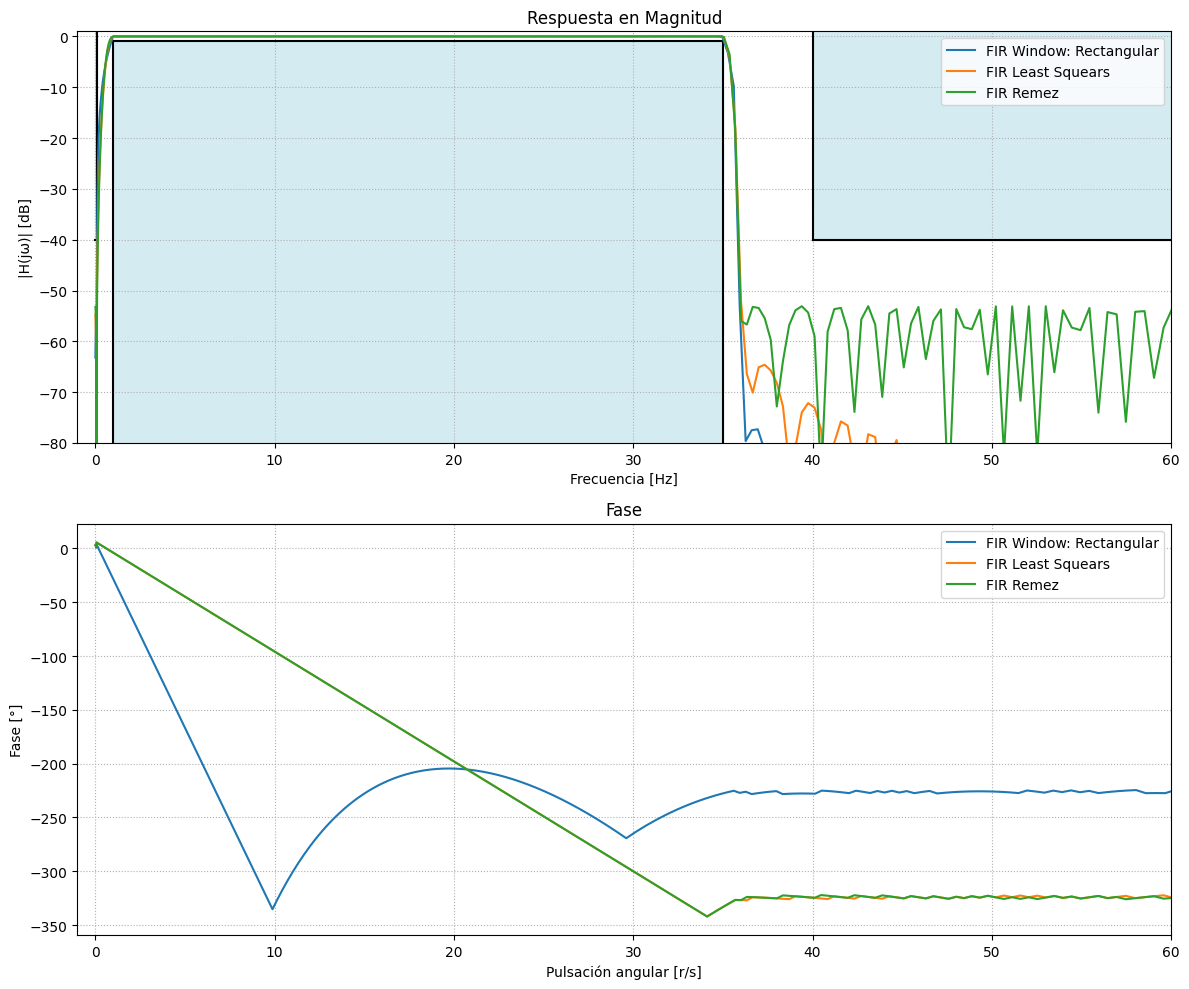

In [21]:
plt.figure(figsize=(12,10))
# Magnitud
plt.subplot(2,1,1)
plantilla(ws = ws, wp = wp, fs = fs ,ripp = ripple, att = atenuacion)
plt.plot(w_win, 20*np.log10(np.abs(h_win)), label = 'FIR Window: Rectangular')
plt.plot(w_ls, 20*np.log10(np.abs(h_ls)), label = 'FIR Least Squears')
plt.plot(w_remez, 20*np.log10(np.abs(h_remez)), label = 'FIR Remez')
plt.title('Respuesta en Magnitud')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('|H(jω)| [dB]')
plt.ylim(-80,1)
plt.xlim(-1,60)
plt.grid(True, which='both', ls=':')
plt.legend()
# Fase
plt.subplot(2,1,2)
plt.plot(w_win, phase_win, label = 'FIR Window: Rectangular')
plt.plot(w_ls, phase_ls, label = 'FIR Least Squears')
plt.plot(w_remez, phase_remez, label = 'FIR Remez')
plt.title('Fase')
plt.xlabel('Pulsación angular [r/s]')
plt.ylabel('Fase [°]')
plt.xlim(-1,60)
plt.grid(True, which='both', ls=':')
plt.legend()

plt.tight_layout()
plt.show()


A simple vista se puede observar que efectivamente que los filtros cuentan con fase lineal en banda de paso. La diferencia de pendiente entre las mismas se relaciona directamente con la cantidad de coeficientes utilizados para el diseño. En cuanto al módulo, se observa que el comportamiento se asemeja a la plantilla. Se observa que cumplen sin conflictos en la segunda transición debido a la predistorción de la plantilla, pero no hay seguridad en cuanto a los vértices de la plantilla.

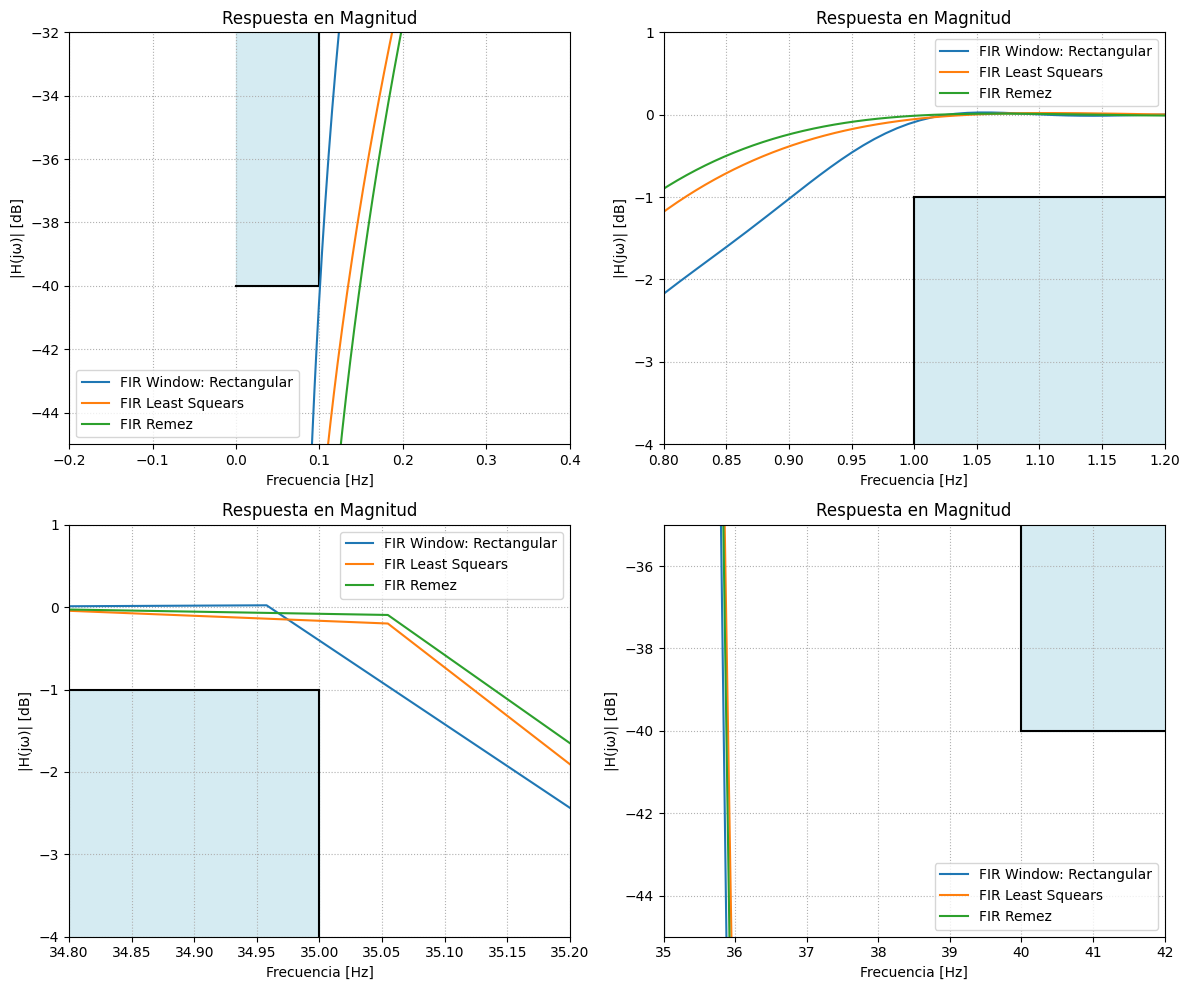

In [22]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
plantilla(ws = ws, wp = wp, fs = fs ,ripp = ripple, att = atenuacion)
plt.plot(w_win, 20*np.log10(np.abs(h_win)), label = 'FIR Window: Rectangular')
plt.plot(w_ls, 20*np.log10(np.abs(h_ls)), label = 'FIR Least Squears')
plt.plot(w_remez, 20*np.log10(np.abs(h_remez)), label = 'FIR Remez')
plt.title('Respuesta en Magnitud')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('|H(jω)| [dB]')
plt.ylim(-45,-32)
plt.xlim(-0.2,0.4)
plt.grid(True, which='both', ls=':')
plt.legend()

plt.subplot(2,2,2)
plantilla(ws = ws, wp = wp, fs = fs ,ripp = ripple, att = atenuacion)
plt.plot(w_win, 20*np.log10(np.abs(h_win)), label = 'FIR Window: Rectangular')
plt.plot(w_ls, 20*np.log10(np.abs(h_ls)), label = 'FIR Least Squears')
plt.plot(w_remez, 20*np.log10(np.abs(h_remez)), label = 'FIR Remez')
plt.title('Respuesta en Magnitud')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('|H(jω)| [dB]')
plt.ylim(-4,1)
plt.xlim(0.8,1.2)
plt.grid(True, which='both', ls=':')
plt.legend()

plt.subplot(2,2,3)
plantilla(ws = ws, wp = wp, fs = fs ,ripp = ripple, att = atenuacion)
plt.plot(w_win, 20*np.log10(np.abs(h_win)), label = 'FIR Window: Rectangular')
plt.plot(w_ls, 20*np.log10(np.abs(h_ls)), label = 'FIR Least Squears')
plt.plot(w_remez, 20*np.log10(np.abs(h_remez)), label = 'FIR Remez')
plt.title('Respuesta en Magnitud')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('|H(jω)| [dB]')
plt.ylim(-4,1)
plt.xlim(34.8,35.2)
plt.grid(True, which='both', ls=':')
plt.legend()

plt.subplot(2,2,4)
plantilla(ws = ws, wp = wp, fs = fs ,ripp = ripple, att = atenuacion)
plt.plot(w_win, 20*np.log10(np.abs(h_win)), label = 'FIR Window: Rectangular')
plt.plot(w_ls, 20*np.log10(np.abs(h_ls)), label = 'FIR Least Squears')
plt.plot(w_remez, 20*np.log10(np.abs(h_remez)), label = 'FIR Remez')
plt.title('Respuesta en Magnitud')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('|H(jω)| [dB]')
plt.ylim(-45,-35)
plt.xlim(35,42)
plt.grid(True, which='both', ls=':')
plt.legend()

plt.tight_layout()
plt.show()

A partir de estos acercamientos, se puede concluir que los filtros si cumplen de forma satisfactoria la plantilla en todos sus vértices. Es importante observar que una gran desventaja del método de ventanas es que requiere de un orden muy alto para que cumpla con la plantilla a diferencia de los otros métodos. Un orden mayor implica mayor costo computacional y mayor retardo.

Al confirmar que los filtros funcionan correctamente, se procede por el filtrado de la señal. En este caso, no se realiza el filtrado bidireccional, ya que no presenta distorción de fase en banda de paso. Para la aplicación del filtro se utilizó la función *lfilter*. Es importante para llevar a cabo la visualización sumar el retardo a la respuesta filtrada.

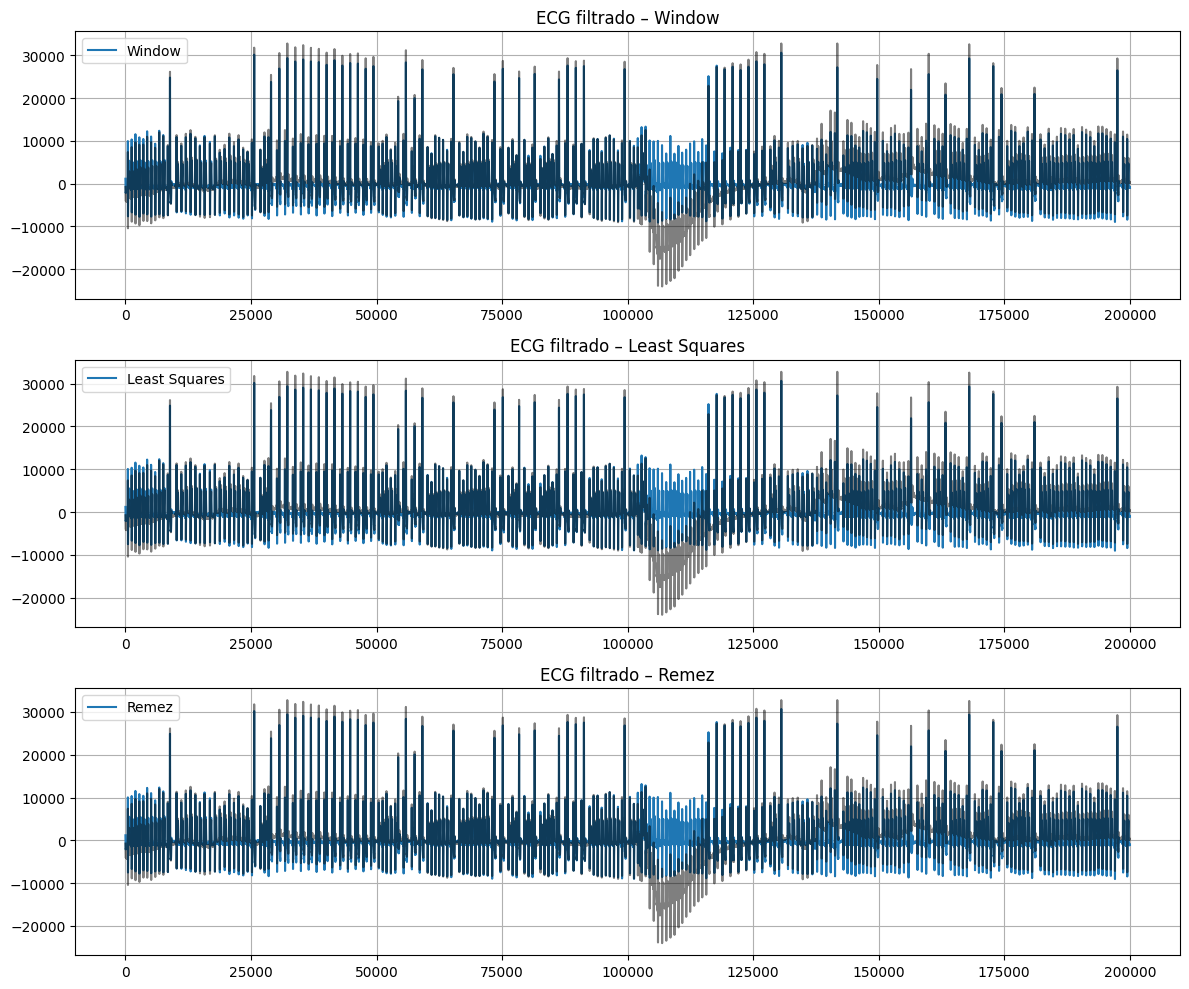

In [20]:
ecg_filt_win = signal.lfilter(b = fir_win, a = 1, x = ecg_one_lead)
ecg_filt_ls = signal.lfilter(b = fir_ls, a = 1, x = ecg_one_lead)
ecg_filt_remez = signal.lfilter(b = fir_remez, a = 1, x = ecg_one_lead)

# VISUALIZACIÓN GRAL
plt.figure(figsize=(12,10))

# Window
plt.subplot(3,1,1)
plt.plot(ecg_filt_win[retardo_win:200000+retardo_win], label='Window')
plt.plot(ecg_one_lead[:200000], color='k', alpha=0.5)
plt.title('ECG filtrado – Window')
plt.legend()
plt.grid(True)

# Least Squares
plt.subplot(3,1,2)
plt.plot(ecg_filt_ls[retardo_ls:200000+retardo_ls], label='Least Squares')
plt.plot(ecg_one_lead[:200000], color='k', alpha=0.5)
plt.title('ECG filtrado – Least Squares')
plt.legend()
plt.grid(True)

# Remez
plt.subplot(3,1,3)
plt.plot(ecg_filt_remez[retardo_remez:200000+retardo_ls], label='Remez')
plt.plot(ecg_one_lead[:200000], color='k', alpha=0.5)
plt.title('ECG filtrado – Remez')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

En un panorama general, se observa que los filtros funcionan correctamente. A continuación, se lleva a cabo un análisis más profundo del filtrado en secciones del ECG, donde se presenta ruido en mayor y menor medida.

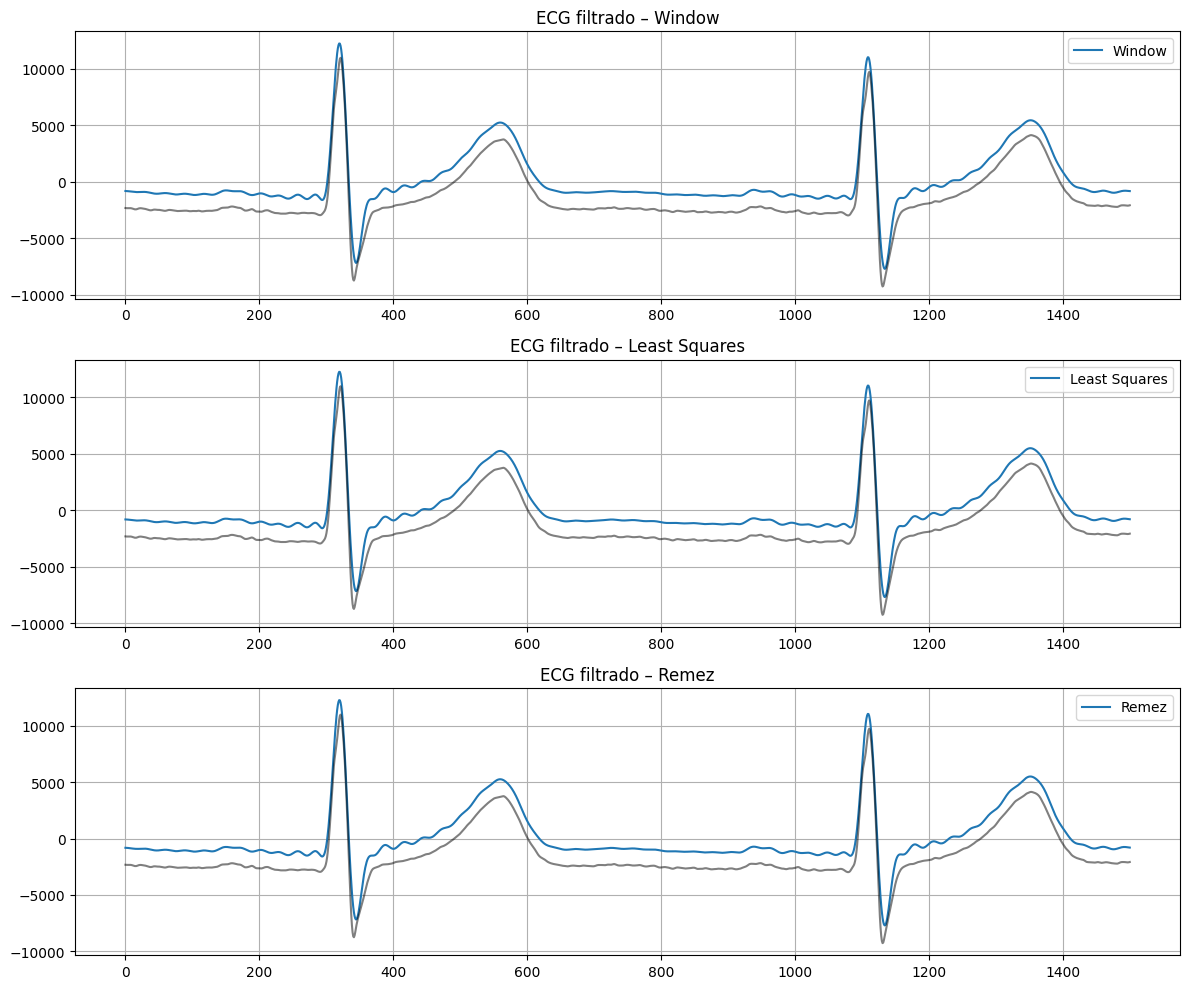

In [16]:
###### SIN RUIDO #######
plt.figure(figsize=(12,10))

# Window
plt.subplot(3,1,1)
plt.plot(ecg_filt_win[4000+retardo_win:5500+retardo_win], label='Window')
plt.plot(ecg_one_lead[4000:5500], color='k', alpha=0.5)
plt.title('ECG filtrado – Window')
plt.legend()
plt.grid(True)

# LS
plt.subplot(3,1,2)
plt.plot(ecg_filt_ls[4000+retardo_ls:5500+retardo_ls], label='Least Squares')
plt.plot(ecg_one_lead[4000:5500], color='k', alpha=0.5)
plt.title('ECG filtrado – Least Squares')
plt.legend()
plt.grid(True)

# Remez
plt.subplot(3,1,3)
plt.plot(ecg_filt_remez[4000+retardo_remez:5500+retardo_remez], label='Remez')
plt.plot(ecg_one_lead[4000:5500], color='k', alpha=0.5)
plt.title('ECG filtrado – Remez')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

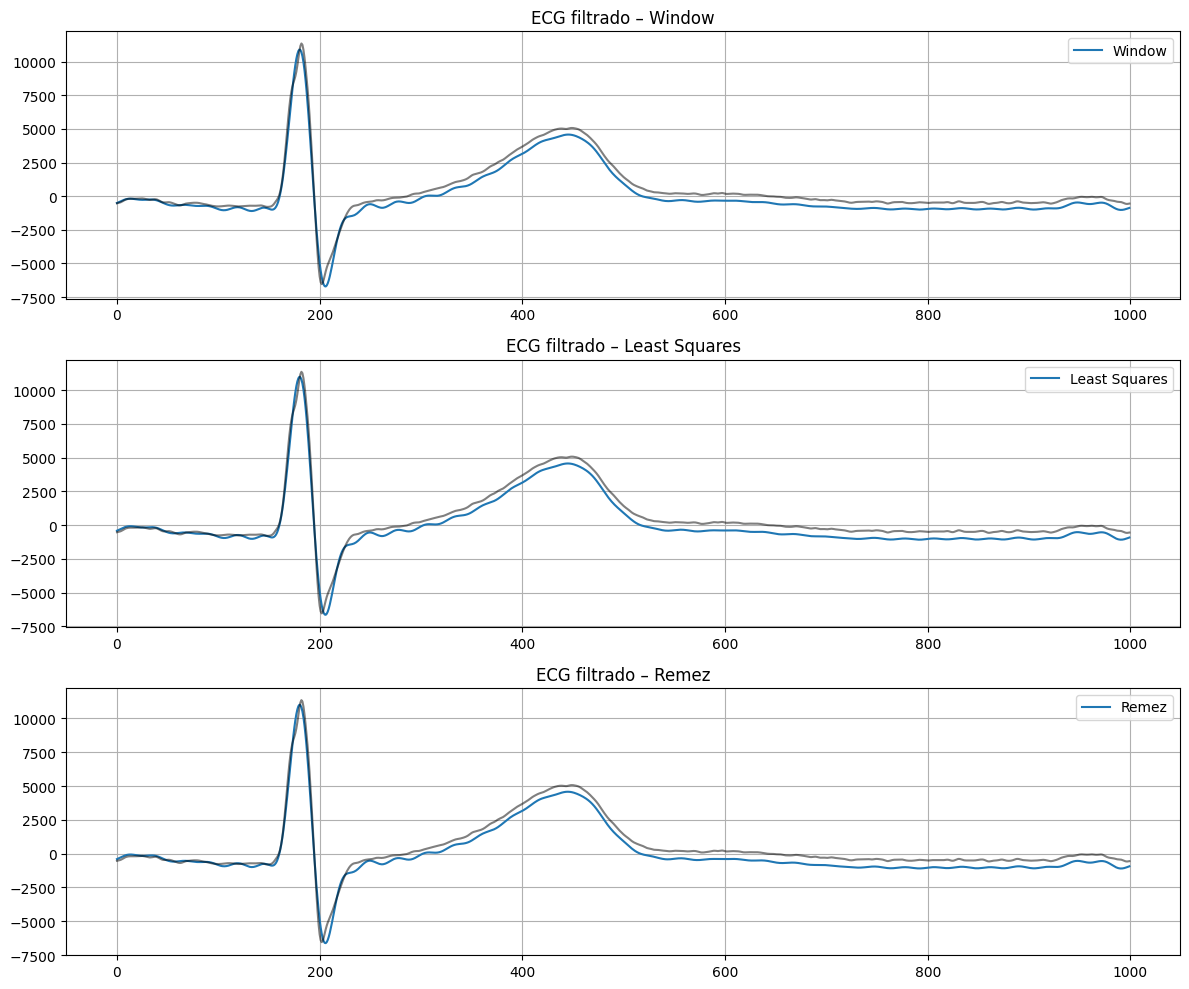

In [19]:
plt.figure(figsize=(12,10))

# Window
plt.subplot(3,1,1)
plt.plot(ecg_filt_win[10000+retardo_win:11000+retardo_win], label='Window')
plt.plot(ecg_one_lead[10000:11000], color='k', alpha=0.5)
plt.title('ECG filtrado – Window')
plt.legend()
plt.grid(True)

# LS
plt.subplot(3,1,2)
plt.plot(ecg_filt_ls[10000+retardo_ls: 11000+retardo_ls], label='Least Squares')
plt.plot(ecg_one_lead[10000 : 11000], color='k', alpha=0.5)
plt.title('ECG filtrado – Least Squares')
plt.legend()
plt.grid(True)

# Remez
plt.subplot(3,1,3)
plt.plot(ecg_filt_remez[10000+retardo_remez : 11000+retardo_remez], label='Remez')
plt.plot(ecg_one_lead[10000 : 11000], color='k', alpha=0.5)
plt.title('ECG filtrado – Remez')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Al realizar el filtrado, se puede observar que los resultados son similares sobre las secciones que no presentan mucho ruido. En los intervalos cercanos al complejo QRS, se observan oscilaciones que no se presentan en la señal original. Este es un efecto de la respuesta al impulso del filtro. El complejo QRS presenta variaciones muy abruptas respecto del resto de la señal, de manera similar a una entrada tipo delta. Por este motivo, parte de la forma de la respuesta al impulso se replica alrededor del pico del QRS. Estas oscilaciones van disminuyendo progresivamente a medida que se alejan del punto de mayor cambio.

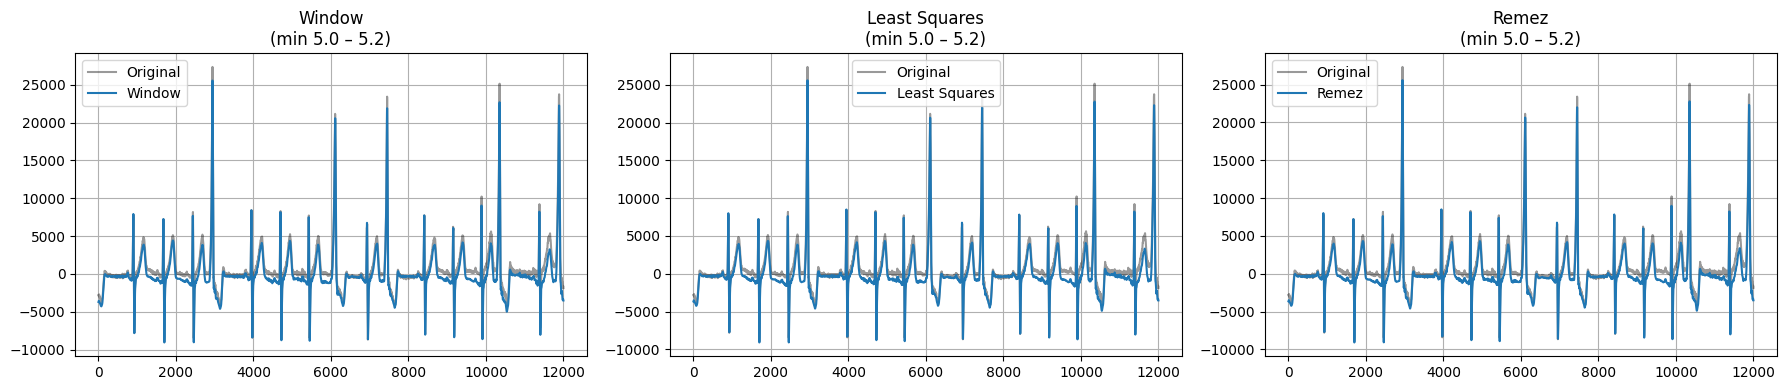

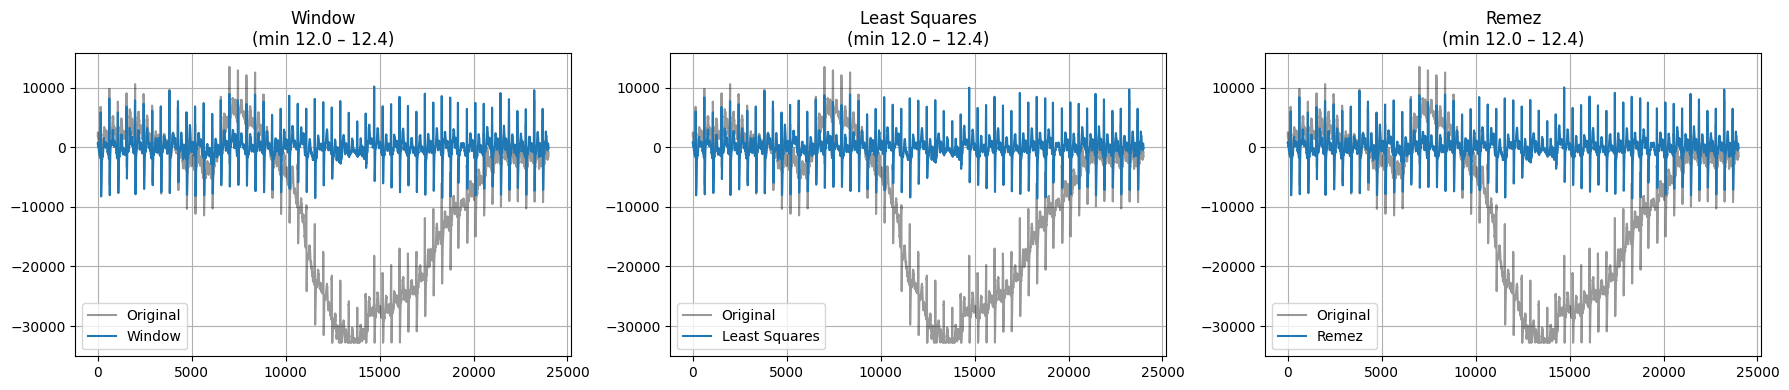

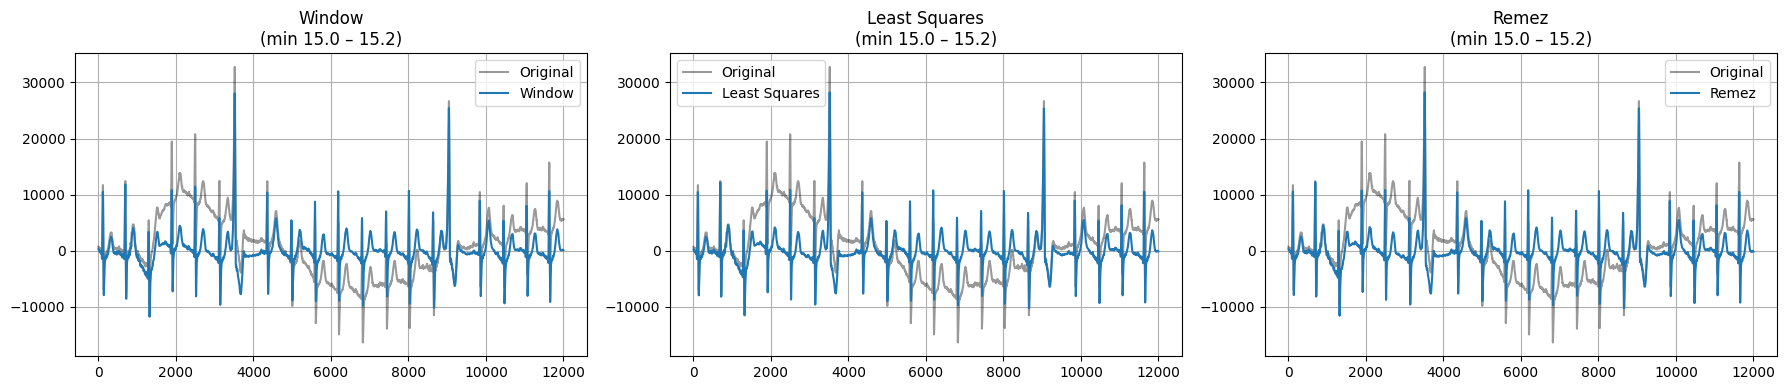

In [23]:
##### CON RUIDO ######
regs_interes = (
    np.array([5, 5.2])  * 60 * fs,
    np.array([12, 12.4]) * 60 * fs,
    np.array([15, 15.2]) * 60 * fs,
)

regs_interes = [(int(a), int(b)) for a, b in regs_interes]

filtros = [
    (ecg_filt_win, "Window", retardo_win),
    (ecg_filt_ls,  "Least Squares", retardo_ls),
    (ecg_filt_remez, "Remez", retardo_remez),
]

for (i0, i1) in regs_interes:
    
    plt.figure(figsize=(18,4))

    for j, (filt, nombre, retardo) in enumerate(filtros, start=1):

        plt.subplot(1, 3, j)
        plt.plot(ecg_one_lead[i0:i1], color='k', alpha=0.4, label="Original")
        plt.plot(filt[i0+retardo:i1+retardo], label=nombre)
        plt.title(f"{nombre}\n(min {i0/(fs*60):.1f} – {i1/(fs*60):.1f})")
        plt.grid(True)
        plt.legend()

    plt.tight_layout()
    plt.show()

En caso de las secciones con mucho ruido, se observa que el rendimiento en general es bueno. En caso de la segunda sección presentada, se puede observar que la señal se cortó debido a una limitación de la forma en la cual se obtuvieron los datos, lo que implica una pérdida de información que no se puede resolver mediante el filtrado. 

## **Conclusiones**

## **Autoevaluación**
**Indicar una opción**:
*Resolví la tarea sin dudas*

**Responder**:

*¿Qué aprendiste al hacer esta tarea? ¿Qué te quedó claro? ¿Qué te sigue costando?*
Aprendimos sobre el diseño de filtros FIR e IIR. Logramos comprender cómo las modificaciones sobre los parámetros afectan el rendimiento de los filtros. Además, logramos distinguir las ventajas y desventajas que los distintos tipos de filtro presentan.

**Indicar si se utilizó IA**:
Se utilizó la IA para terminar de comprender conceptos teóricos.